In [1]:
import gc
gc.collect()

200

# 01. Import libraries 

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from datetime import datetime
import folium
import json
from folium.plugins import MarkerCluster

In [3]:
# Create a path for easier importing
path = r'C:\Users\blim9\Desktop\Google Data Analytics\Case Study'

In [4]:
df = pd.read_pickle(os.path.join (path, 'Data', 'Prepared Data', 'cleaned_data.pkl'))

# 02. Analysis

In [5]:
df.head()

,ride_id,rideable_type,member_type,start_date_time,end_date_time,ride_length,month,day_of_week,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_long,end_lat,end_long
30,DD06751C6019D865,classic_bike,member,2021-08-08 17:21:26,2021-08-08 17:25:37,251.0,8,6,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888718,-87.644447,41.889175,-87.638504
36,79973DC3B232048F,classic_bike,member,2021-08-27 08:53:52,2021-08-27 09:18:29,1477.0,8,4,Larrabee St & Armitage Ave,TA1309000006,Michigan Ave & Oak St,13042,41.918083,-87.643745,41.900959,-87.623779
72,F41EB054E44ACFDA,classic_bike,casual,2021-08-12 16:52:09,2021-08-12 16:56:51,282.0,8,3,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900959,-87.623779,41.900959,-87.623779
121,B149E6C71A1C3B14,classic_bike,casual,2021-08-23 15:33:04,2021-08-23 16:09:00,2156.0,8,0,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900959,-87.623779,41.900959,-87.623779
123,C41829CD6CC5A8B6,classic_bike,casual,2021-08-23 10:11:09,2021-08-23 10:51:11,2402.0,8,0,Aberdeen St & Jackson Blvd,13157,Aberdeen St & Jackson Blvd,13157,41.877728,-87.654785,41.877728,-87.654785


In [6]:
df['member_type'].value_counts()

member    2641236
casual    1929410
Name: member_type, dtype: int64

In [7]:
# Replace 'member' to 'annual' for readability and context
df['member_type'] = df['member_type'].replace({'member':'annual'})

In [8]:
df['member_type'].value_counts()

annual    2641236
casual    1929410
Name: member_type, dtype: int64

In [9]:
# Count each type of bike used
df['rideable_type'].value_counts()

classic_bike     3013450
electric_bike    1333630
docked_bike       223566
Name: rideable_type, dtype: int64

In [10]:
# Compare the min, max, and average ride_length for casual riders and annual riders
df.groupby('member_type').agg({'ride_length': ['min','max','mean']})

ride_length                        
                    min        max         mean
member_type                                    
annual             46.0    89575.0   766.665222
casual             46.0  2497750.0  1598.603027

In [11]:
# See which stations are the most popular starting points
df['start_station_name'].value_counts()

Streeter Dr & Grand Ave                 75996
DuSable Lake Shore Dr & North Blvd      42807
DuSable Lake Shore Dr & Monroe St       40784
Michigan Ave & Oak St                   40648
Wells St & Concord Ln                   39550
                                        ...  
Kedzie & 103rd St - East                    1
Bensley Ave & 103rd St                      1
Wallace St & 112 St                         1
Rockwell & 111th St                         1
Public Rack - Stony Island & 87th St        1
Name: start_station_name, Length: 1298, dtype: int64

In [12]:
# See which stations are the most popular end points
df['end_station_name'].value_counts()

Streeter Dr & Grand Ave               77386
DuSable Lake Shore Dr & North Blvd    47255
Michigan Ave & Oak St                 41496
DuSable Lake Shore Dr & Monroe St     39761
Wells St & Concord Ln                 39567
                                      ...  
63rd & Western Ave - south corner         1
Justine St & 87th St                      1
Baltimore Ave & 132nd St                  1
Piotrowski Park                           1
Ada St & 119th St                         1
Name: end_station_name, Length: 1317, dtype: int64

In [13]:
# See which day is the most popular in the week
df['day_of_week'].value_counts()

5    768359
6    700073
3    643907
2    621506
4    620977
1    616674
0    599150
Name: day_of_week, dtype: int64

In [14]:
# See which month is the most popular for riding
df['month'].value_counts()

8     667391
7     632735
9     614528
6     611407
5     495335
10    472454
4     269160
11    252774
3     213396
12    174343
2      87894
1      79229
Name: month, dtype: int64

In [15]:
# Create a crosstab to identify what type of bikes each type of member uses
bike_crosstab = pd.crosstab(df['member_type'], df['rideable_type'])

In [16]:
bike_crosstab

rideable_type,classic_bike,docked_bike,electric_bike
member_type,,,
annual,1895671,0,745565
casual,1117779,223566,588065


#### This shows that annual members do not use any docked bikes, with a preference for classic and electric bikes.

In [17]:
# Create a crosstab to identify which day of the week annual and casual riders ride the most
dayofweek_crosstab = pd.crosstab(df['member_type'], df['day_of_week'])

In [18]:
dayofweek_crosstab

day_of_week,0,1,2,3,4,5,6
member_type,,,,,,,
annual,372169,414218,412974,408746,359822,350023,323284
casual,226981,202456,208532,235161,261155,418336,376789


In [19]:
# Create a crosstab to identify which month annual and casual riders ride the most
month_crosstab = pd.crosstab(df['member_type'], df['month'])

In [20]:
month_crosstab

month,1,2,3,4,5,6,7,8,9,10,11,12
member_type,,,,,,,,,,,,
annual,66731,72895,146858,178167,277888,323090,325231,328639,323944,284808,183377,129608
casual,12498,14999,66538,90993,217447,288317,307504,338752,290584,187646,69397,44735


In [21]:
df['start_station_name'].value_counts().head(10)

Streeter Dr & Grand Ave               75996
DuSable Lake Shore Dr & North Blvd    42807
DuSable Lake Shore Dr & Monroe St     40784
Michigan Ave & Oak St                 40648
Wells St & Concord Ln                 39550
Millennium Park                       36223
Clark St & Elm St                     35980
Theater on the Lake                   34349
Wells St & Elm St                     33789
Kingsbury St & Kinzie St              33739
Name: start_station_name, dtype: int64

In [22]:
# Check the top 5 starting stations for each type of member
df.groupby(['member_type']).start_station_name.value_counts().groupby(level=0, group_keys=False).head(5)

member_type  start_station_name                
annual       Kingsbury St & Kinzie St              24924
             Clark St & Elm St                     22162
             Wells St & Concord Ln                 21981
             Wells St & Elm St                     19425
             Clinton St & Madison St               18600
casual       Streeter Dr & Grand Ave               59649
             DuSable Lake Shore Dr & Monroe St     31373
             Millennium Park                       27395
             Michigan Ave & Oak St                 26562
             DuSable Lake Shore Dr & North Blvd    25710
Name: start_station_name, dtype: int64

In [23]:
# Check the top 5 ending stations for each type of member
df.groupby(['member_type']).end_station_name.value_counts().groupby(level=0, group_keys=False).head(5)

member_type  end_station_name                  
annual       Kingsbury St & Kinzie St              24688
             Wells St & Concord Ln                 22549
             Clark St & Elm St                     22373
             Wells St & Elm St                     19465
             Clinton St & Washington Blvd          19238
casual       Streeter Dr & Grand Ave               62512
             DuSable Lake Shore Dr & North Blvd    29931
             DuSable Lake Shore Dr & Monroe St     29452
             Millennium Park                       28927
             Michigan Ave & Oak St                 28307
Name: end_station_name, dtype: int64

# 03. Visualizations

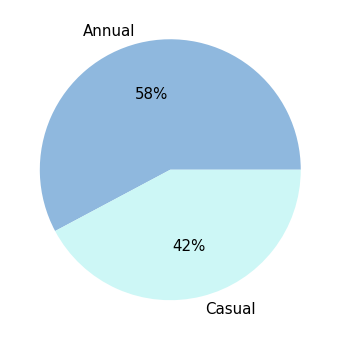

In [24]:
# Create a pie chart displaying the types of riders
member_pie = df['member_type'].value_counts()
membertype_pie = member_pie.plot.pie(label = '', labels = ['Annual', 'Casual'], autopct=('%1.f%%'), colors=['#8FB8DE', '#CDF7F6'], textprops={'fontsize': 15}, figsize=[8,6])

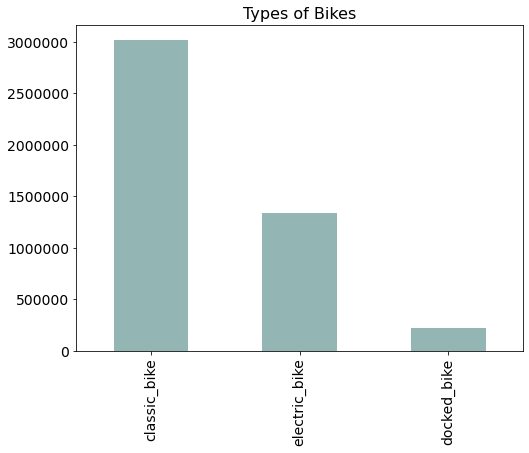

In [25]:
# Create a bar chart displaying the types of bikes 
bike_bar = df['rideable_type'].value_counts().loc[['classic_bike', 'electric_bike', 'docked_bike']].plot.bar(figsize = [8,6], color='#93B5B3')
plt.title('Types of Bikes', fontdict = {'fontsize': 16} )
plt.ticklabel_format(style='plain', axis='y')
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.show()

In [26]:
# Change the day_of_week column to a string
df['day_of_week'] = df['day_of_week'].astype('str')

In [27]:
# Replace the numerical values with its corresponding day values
df['day_of_week'].replace({'0': 'Monday', '1': 'Tuesday', '2': 'Wednesday', '3': 'Thursday', '4': 'Friday', '5': 'Saturday', '6': 'Sunday'}, inplace = True)

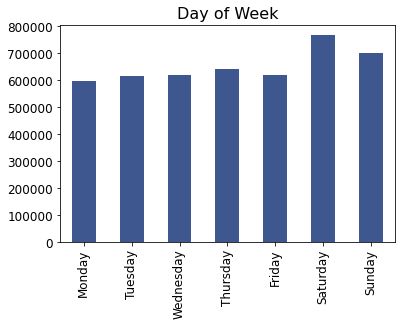

In [28]:
# Create a bar chart displaying the number of rides for each day of the week
day_bar = df['day_of_week'].value_counts().loc[['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar(color='#3E588F')
plt.title('Day of Week', fontdict = {'fontsize': 16})
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

In [29]:
# Change the month column to a string
df['month'] = df['month'].astype('str')

In [30]:
# Replace the numerical values with its corresponding day values
df['month'].replace({'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5': 'May', '6': 'June', '7': 'July', '8': 'August',
                 '9': 'September', '10': 'October', '11': 'November', '12': 'December'}, inplace = True)

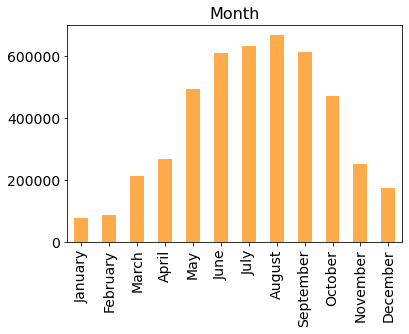

In [31]:
# Create a bar chart displaying the number of rides for each month of the year
month_bar = df['month'].value_counts().loc[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                                        'October', 'November', 'December']].plot.bar(color='#FFAB4C')
plt.title('Month', fontdict = {'fontsize': 16})
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

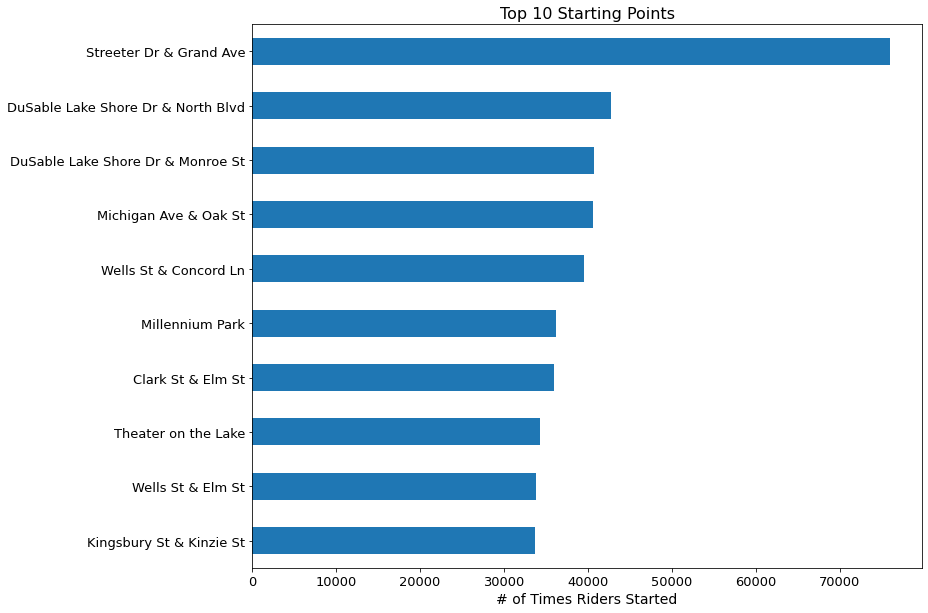

In [32]:
# Create a horizontal bar chart for the top 10 stations riders start at
station_bar = df['start_station_name'].value_counts().head(10).sort_values().plot.barh(fontsize=13, figsize =[12,10])
plt.title('Top 10 Starting Points', fontdict = {'fontsize': 16})
plt.xlabel('# of Times Riders Started', fontdict = {'fontsize': 14})
plt.show()

# 05. Export the visualizations

In [33]:
# Export the member type pie chart
membertype_pie.figure.savefig(os.path.join(path, '03. Visualizations', 'member_pie_chart.png'))

In [34]:
# Export the bike type bar chart
bike_bar.figure.savefig(os.path.join(path, '03. Visualizations', 'bike_type_barchart.png'))

In [35]:
# Export the day of week bar chart
day_bar.figure.savefig(os.path.join(path, '03. Visualizations', 'day_barchart.png'))

In [36]:
# Export the month bar chart
month_bar.figure.savefig(os.path.join (path, '03. Visualizations', 'month_barchart.png'))

In [37]:
# Export the starting station horizontal bar chart
station_bar.figure.savefig(os.path.join (path, '03. Visualizations', 'station_hbarchart.png'))

In [38]:
# Export the final dataaset
df.to_csv(os.path.join (path, 'Data', 'Prepared Data', 'final_dataset.csv'))